In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


path = '/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/data/preprocessedData'

In [2]:
X_train = pd.read_csv(path + '/X_train.csv')
y_train = pd.read_csv(path + '/y_train.csv')
X_val = pd.read_csv(path + '/X_val.csv')
y_val = pd.read_csv(path + '/y_val.csv')
test = pd.read_csv(path + '/test.csv')

In [3]:
#Reshape
image_col = 28
image_row = 28
X_train1 = X_train.values.reshape(X_train.shape[0],image_col,image_row,1)
X_val1 = X_val.values.reshape(X_val.shape[0],image_col,image_row,1)
test1 = test.values.reshape(test.shape[0],image_col,image_row,1)
X_train1.shape,X_val1.shape,test1.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (28000, 28, 28, 1))

In [4]:
# Label Encoding (# convert label to one-hot-encoding)
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train1 = to_categorical(y_train, num_classes = 10)
y_val1 = to_categorical(y_val, num_classes = 10)
y_train1.shape,y_val1.shape

((37800, 10), (4200, 10))

VGG16

In [5]:
import tensorflow as tf
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Add, Activation,GlobalAveragePooling2D,Flatten

model = Sequential()

# 1st convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 2nd convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 1st pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Dropout(0.2))

# 3rd convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4th convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 2nd pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Dropout(0.2))

# 5th convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 6th convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 7th convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 3rd pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Dropout(0.2))

# 8th convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 9th convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 10th convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4th pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Dropout(0.2))

# 11th convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 12th convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 13th convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5th pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Dropout(0.2))

# full connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


In [6]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
epochs = 20  # for better result increase the epochs
batch_size = 32

In [8]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


# datagen.fit(X_train)    #Only required if featurewise_center or featurewise_std_normalization or zca_whitening are set to True.

In [11]:
# Checkpoint
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/checkpoints/vgg16/vgg16.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True, 
                                                 verbose=1)

In [12]:
# Fit the model
# datagen.flow takes data & label arrays, generates batches of augmented data.
history = model.fit(datagen.flow(X_train1,y_train1, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val1,y_val1), 
                              steps_per_epoch=X_train1.shape[0] // batch_size,
                              callbacks=[cp_callback])

Epoch 1/20
1181/1181 [==============================] - ETA: 0s - loss: 0.1381 - accuracy: 0.9665
Epoch 00001: saving model to /content/drive/MyDrive/Colab Notebooks/Digit Recognizer/checkpoints/vgg16/vgg16.ckpt
1181/1181 [==============================] - 39s 33ms/step - loss: 0.1381 - accuracy: 0.9665 - val_loss: 0.2553 - val_accuracy: 0.9424
Epoch 2/20
1181/1181 [==============================] - ETA: 0s - loss: 0.1176 - accuracy: 0.9736
Epoch 00002: saving model to /content/drive/MyDrive/Colab Notebooks/Digit Recognizer/checkpoints/vgg16/vgg16.ckpt
1181/1181 [==============================] - 39s 33ms/step - loss: 0.1176 - accuracy: 0.9736 - val_loss: 0.0968 - val_accuracy: 0.9788
Epoch 3/20
1181/1181 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9768
Epoch 00003: saving model to /content/drive/MyDrive/Colab Notebooks/Digit Recognizer/checkpoints/vgg16/vgg16.ckpt
1181/1181 [==============================] - 39s 33ms/step - loss: 0.1059 - accuracy: 0.9768 -

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 64)    640       
_________________________________________________________________
batch_normalization (BatchNo (None, None, None, 64)    256       
_________________________________________________________________
activation (Activation)      (None, None, None, 64)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, None, 64)    256       
_________________________________________________________________
activation_1 (Activation)    (None, None, None, 64)    0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 64)    0

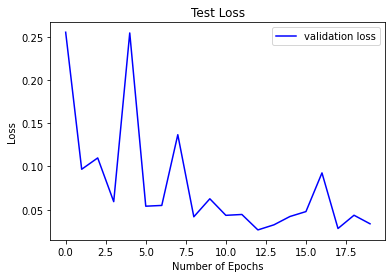

In [14]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

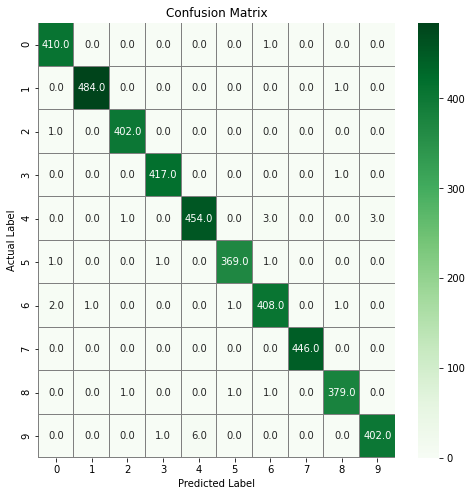

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict the values from the validation dataset
y_pred = model.predict(X_val1)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val1,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

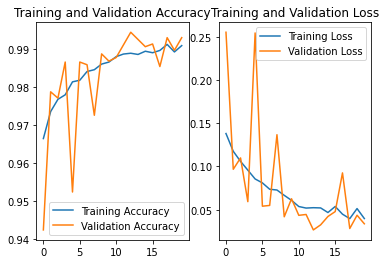

In [20]:
# 显示训练集和验证集的acc和loss曲线
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [17]:
#output_path = '/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/result/basicCnn.csv'
predictions = model.predict(test1, verbose=0)
#print(predictions)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": np.argmax(predictions,axis=1)})
submissions.to_csv('vgg.csv', index=False, header=True)

In [18]:
print(np.argmax(predictions,axis=1)[:50])

[2 0 9 0 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 4 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 2 6 7]


In [ ]:
#Test checkpoint
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/checkpoints/vgg16/vgg16.ckpt'
model.load_weights(checkpoint_path)

In [ ]:
predictions = model.predict(test1, verbose=0)
print(np.argmax(predictions,axis=1)[:50])

[2 0 9 0 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 4 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 2 6 7]


In [29]:
 !kaggle competitions submit -c digit-recognizer -f vgg.csv -m "vgg16 result"

100% 208k/208k [00:00<00:00, 377kB/s]
Successfully submitted to Digit Recognizer